# Machine Translation

English-German Translation

# 1)- Importing key modules

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# What's life without style :). So, let's add style to our dataframes
#from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

In [0]:
import pandas as pd 
import string 
import pickle
from pickle import dump
from pickle import load
from string import digits
import re 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from numpy import array, argmax, random, take 
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.set_option('display.max_colwidth', 200)

In [4]:
from keras.models import Model
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Embedding,Input,RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint 
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model 
from keras import optimizers 

Using TensorFlow backend.


In [5]:
!  pip install version_information

In [6]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas,re,sklearn, matplotlib,keras

Software versions
Python 3.6.8 64bit [GCC 8.0.1 20180414 (experimental) [trunk revision 259383]
IPython 5.5.0
OS Linux 4.14.137+ x86_64 with Ubuntu 18.04 bionic
pandas 0.24.2
re 2.2.1
sklearn 0.21.3
matplotlib 3.0.3
keras 2.2.5
Wed Sep 11 13:05:46 2019 UTC

# 2)- Reading Dataset

In [0]:
lines= pd.read_pickle('data_2015.pkl')

In [8]:
lines.shape

(2169, 2)

In [9]:
lines.head()

,eng,ger
0,unk and unk prime unk unk in unk,die premierminister unk und unk unk sich in unk
1,unk new prime minister unk unk is meeting his unk unk unk unk in unk to unk economic and security unk on his first major foreign unk since unk unk election,unk unk premierminister unk unk unk bei seinem ersten unk unk seit seinem unk im mai seinen unk unk unk unk in unk um unk und unk unk zu unk
2,mr unk is on a unk unk to unk to unk economic unk with the third largest economy in the world,herr unk unk sich auf einer unk unk nach unk um die wirtschaftlichen unk mit der unk unk der welt zu unk
3,high on the unk are plans for unk unk unk,plane fur eine unk unk unk stehen ganz oben auf der unk
4,unk is also unk unk for a deal on unk unk between the two unk,berichten zufolge hofft unk daruber hinaus auf einen unk zur unk zwischen den beiden unk


As this is big data and I have a poor old computing machine. So, I ll use smaller sample. It got to be random to avoid sample biaseness

In [10]:
lines.sample(15)

,eng,ger
741,the past unk in order that we forget it,die vergangenheit unk dazu dass wir sie vergessen
749,prime minister thomas unk unk the country saying the unk military had unk his official home and seized government buildings in the capital of unk,premierminister thomas unk unk aus dem land und teilte mit dass die armee des landes seinen unk unk und unk in der hauptstadt unk unk habe
548,i do not unk the tweet and i have taken it down the later post said,ich unk den tweet nicht und habe ihn unk unk es in der unk unk
1485,stewart unk his unk car to the unk and then unk without speaking to unk,stewart fuhr sein unk unk in die unk und unk es ohne mit unk zu sprechen
2083,all candidates must first unk majority unk from a unk committee likely to be unk with beijing unk,alle kandidaten mussen unk die unk unterstutzung eines unk unk das voraussichtlich mit unk unk unk ist
1919,a unk party unk local police and unk unk was sent out and the unk were found about near unk unk unk,ein unk aus unk polizei und unk unk auf und das paar wurde um etwa uhr in der nahe der unk unk unk gefunden
1653,meanwhile small businesses in the unk region unk to be unk better and unk unk more state and local taxes according to the recent study,in der unk scheint es den unk im raum washington besser zu gehen und sie zahlen daher mehr staatliche und ortliche steuern so die unk studie
202,refugees at unk unk will now be unk in tents,am unk platz werden fluchtlinge jetzt in unk unk
1167,you cant unk the pleura he says,man kann das brustfell nicht unk sagt er
77,the research unk by the unk unk unk to unk cancer will be unk today in the medical unk of unk,die von unk unk unk unk unk unk unk studie wird heute im unk unk of unk veroffentlicht


In [0]:
#lines = lines[:5000]

# 3)- Data Preprocessing

In [0]:
# Lowercase all characters
lines.eng=lines.eng.apply(lambda x: x.lower())
lines.ger=lines.ger.apply(lambda x: x.lower())

In [0]:
# Remove quotes
lines.eng=lines.eng.apply(lambda x: re.sub("'", '', x))
lines.ger=lines.ger.apply(lambda x: re.sub("'", '', x))

In [0]:
exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
lines.eng=lines.eng.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines.ger=lines.ger.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [0]:
# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
lines.eng=lines.eng.apply(lambda x: x.translate(remove_digits))
lines.ger=lines.ger.apply(lambda x: x.translate(remove_digits))

In [0]:
# Remove extra spaces
lines.eng=lines.eng.apply(lambda x: x.strip())
lines.ger=lines.ger.apply(lambda x: x.strip())
lines.eng=lines.eng.apply(lambda x: re.sub(" +", " ", x))
lines.ger=lines.ger.apply(lambda x: re.sub(" +", " ", x))

**Do threshold here**

In [0]:
# Add start and end tokens to target sequences. I am not German so , I am doing so for my ease
lines.ger = lines.ger.apply(lambda x : 'START_ '+ x + ' _END')

In [18]:
lines.ger[:5]

0                                                                                                 START_ die premierminister unk und unk unk sich in unk _END
1    START_ unk unk premierminister unk unk unk bei seinem ersten unk unk seit seinem unk im mai seinen unk unk unk unk in unk um unk und unk unk zu unk _END
2                                        START_ herr unk unk sich auf einer unk unk nach unk um die wirtschaftlichen unk mit der unk unk der welt zu unk _END
3                                                                                         START_ plane fur eine unk unk unk stehen ganz oben auf der unk _END
4                                                        START_ berichten zufolge hofft unk daruber hinaus auf einen unk zur unk zwischen den beiden unk _END
Name: ger, dtype: object

In [19]:
lines.sample(10)

,eng,ger
430,the unk unk unk unk unk unk will be heard for the first time in court on november,START_ der unk um den unk unk unk wird am november unk vor gericht unk _END
1949,the unk and unk unk hofmann who unk up to third place with unk confirmed that the sense of unk was unk important,START_ das unk war unk wichtig bestatigte unk und unk unk hofmann der mit unk auf platz drei unk _END
1022,he had mesothelioma an unk cancer that unk the pleura or lining of the lung,START_ er unk an mesotheliom einem unk unk der das brustfell also die die lungen unk haut unk _END
1834,unk texts for his last semester would have cost he says,START_ die fur das letzte semester unk bucher hatten ihn unk sagte er _END
1672,more business unk,START_ mehr unk _END
2059,unk the unk could further unk,START_ unk konne sich die unk weiter unk _END
1175,after unk mesothelioma abbott was put in unk with andrew lawson who four years after his diagnosis had become a unk support and unk unk for fellow sufferers,START_ nachdem er mesotheliom unk hatte kam abbott in kontakt mit andrew lawson der vier jahre nach seiner diagnose ein unk und unk fur unk geworden war _END
1668,this unk for like already unk out of mr li he said unk the unk,START_ diese unk unk bereits herr li aus unk er dem unk _END
843,she unk unk her unk with damir to london,START_ sie erinnert sich unk an ihre unk nach london mit damir _END
643,theyre not really unk kevern said,START_ die sind nicht wirklich unk sagte kevern _END


### 3a)- Vocab Size

In [0]:
# Vocabulary of English
all_eng_words=set()
for eng in lines.eng:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)
# Vocabulary of German 
all_german_words=set()
for ger in lines.ger:
    for word in ger.split():
        if word not in all_german_words:
            all_german_words.add(word)

In [21]:
# Max Length of source sequence
import numpy as np
lenght_list=[]
for l in lines.eng:
    lenght_list.append(len(l.split(' ')))
max_length_src = np.max(lenght_list)
max_length_src

71

In [22]:
# Max Length of target sequence
lenght_list=[]
for l in lines.ger:
    lenght_list.append(len(l.split(' ')))
max_length_tar = np.max(lenght_list)
max_length_tar

73

In [23]:
lines['word_eng'] = lines['eng'].apply(lambda x: len(str(x).split(" ")))
lines[['eng','word_eng']].head()

,eng,word_eng
0,unk and unk prime unk unk in unk,8
1,unk new prime minister unk unk is meeting his unk unk unk unk in unk to unk economic and security unk on his first major foreign unk since unk unk election,31
2,mr unk is on a unk unk to unk to unk economic unk with the third largest economy in the world,21
3,high on the unk are plans for unk unk unk,10
4,unk is also unk unk for a deal on unk unk between the two unk,15


In [24]:
# adding +2 due to adding of START and END
lines['word_ger'] = lines['ger'].apply(lambda x: len(str(x).split(" ")))
lines[['ger','word_ger']].head()

,ger,word_ger
0,START_ die premierminister unk und unk unk sich in unk _END,11
1,START_ unk unk premierminister unk unk unk bei seinem ersten unk unk seit seinem unk im mai seinen unk unk unk unk in unk um unk und unk unk zu unk _END,32
2,START_ herr unk unk sich auf einer unk unk nach unk um die wirtschaftlichen unk mit der unk unk der welt zu unk _END,24
3,START_ plane fur eine unk unk unk stehen ganz oben auf der unk _END,14
4,START_ berichten zufolge hofft unk daruber hinaus auf einen unk zur unk zwischen den beiden unk _END,17


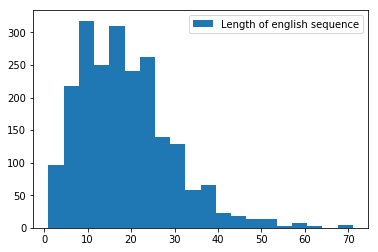

In [25]:
words_eng=lines['word_eng']
plt.hist(words_eng, bins=20, label="Length of english sequence") 
plt.legend() 
plt.show()

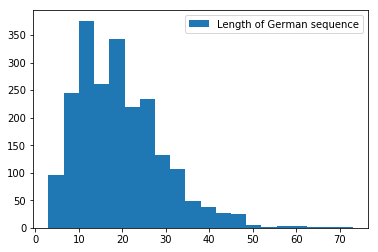

In [26]:
words_ger=lines['word_ger']
plt.hist(words_ger, bins=20, label="Length of German sequence") 
plt.legend() 
plt.show()

### 3b)-Words' frequency

In [27]:
# let’s check the 10 most frequently occurring words in our English text data
freq_eng = pd.Series(' '.join(lines['eng']).split()).value_counts()[:10]
freq_eng

unk     9455
the     2643
to      1115
of      1078
in      1015
and      953
a        903
for      423
that     410
is       400
dtype: int64

In [28]:
freq_ger = pd.Series(' '.join(lines['ger']).split()).value_counts()[:12]
freq_ger

unk       11732
_END       2169
START_     2169
die        1256
der        1177
und         940
in          790
den         453
von         433
das         426
zu          406
fur         333
dtype: int64

As we have start and end so, I did check 12 so that we get idea of most fequent words

**How about least occuring words**

In [29]:
less_freq_eng = pd.Series(' '.join(lines['eng']).split()).value_counts()[-10:]
less_freq_eng

cannon          5
intelligence    5
prison          5
moved           5
tried           5
wouldnt         5
nice            5
meaning         5
noted           5
sent            5
dtype: int64

In [30]:
less_freq_ger = pd.Series(' '.join(lines['ger']).split()).value_counts()[-10:]
less_freq_ger

mannschaften    5
hohen           5
schotten        5
erfahrung       5
potzl           5
tor             5
kleines         5
aussage         5
mussten         5
abtreibungen    5
dtype: int64

### 3a)- Defining input and target

In [31]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_german_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_german_words)
num_encoder_tokens, num_decoder_tokens

(1211, 991)

In [32]:
num_decoder_tokens += 1 # For zero padding
num_decoder_tokens

992

In [0]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [0]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [35]:
print(reverse_input_char_index)

{1: 'a', 2: 'abandoned', 3: 'abbott', 4: 'able', 5: 'abortions', 6: 'about', 7: 'above', 8: 'access', 9: 'according', 10: 'account', 11: 'accused', 12: 'across', 13: 'act', 14: 'action', 15: 'actions', 16: 'activists', 17: 'actually', 18: 'addition', 19: 'adelaide', 20: 'admitting', 21: 'affected', 22: 'africa', 23: 'after', 24: 'again', 25: 'against', 26: 'age', 27: 'ago', 28: 'agreed', 29: 'agreement', 30: 'ahead', 31: 'ailinn', 32: 'air', 33: 'airport', 34: 'all', 35: 'allow', 36: 'almost', 37: 'alone', 38: 'along', 39: 'already', 40: 'also', 41: 'although', 42: 'always', 43: 'alyona', 44: 'am', 45: 'amazon', 46: 'america', 47: 'american', 48: 'americans', 49: 'among', 50: 'amount', 51: 'an', 52: 'and', 53: 'andrew', 54: 'anniversary', 55: 'announced', 56: 'announcement', 57: 'annual', 58: 'another', 59: 'answer', 60: 'any', 61: 'anyone', 62: 'apollo', 63: 'april', 64: 'are', 65: 'area', 66: 'areas', 67: 'arm', 68: 'army', 69: 'around', 70: 'as', 71: 'asbestos', 72: 'asked', 73: 'as

In [36]:
print(reverse_target_char_index)

{1: 'START_', 2: '_END', 3: 'ab', 4: 'abbott', 5: 'abend', 6: 'aber', 7: 'abtreibungen', 8: 'adelaide', 9: 'ailinn', 10: 'aljona', 11: 'all', 12: 'alle', 13: 'allein', 14: 'allem', 15: 'allen', 16: 'aller', 17: 'allerdings', 18: 'alles', 19: 'als', 20: 'also', 21: 'alt', 22: 'alten', 23: 'alter', 24: 'altere', 25: 'am', 26: 'amazon', 27: 'amerikanischen', 28: 'an', 29: 'andere', 30: 'anderem', 31: 'anderen', 32: 'anders', 33: 'andrew', 34: 'anfang', 35: 'angaben', 36: 'angeblich', 37: 'angeboten', 38: 'angekundigt', 39: 'angst', 40: 'anklage', 41: 'anstieg', 42: 'anteil', 43: 'apollo', 44: 'april', 45: 'arbeit', 46: 'arbeiten', 47: 'arbeiter', 48: 'arbeitete', 49: 'arbeitsplatz', 50: 'armee', 51: 'art', 52: 'arzt', 53: 'arzte', 54: 'arzten', 55: 'asbest', 56: 'asbestkontakt', 57: 'auch', 58: 'auer', 59: 'auerdem', 60: 'auf', 61: 'aufgabe', 62: 'aufgenommen', 63: 'aufgerufen', 64: 'aufgrund', 65: 'aufhoren', 66: 'augen', 67: 'august', 68: 'aus', 69: 'ausbildung', 70: 'ausgaben', 71: 'au

### 3b)-Train - Test Split

For validation

In [37]:
X, y = lines.eng, lines.ger #X being input, y being target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((1735,), (434,))

**Save the train and test dataframes for reproducing the results later, as they are shuffled**

In [0]:
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')

In [0]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

# 4)-Encoder - Decoder Model Architecture

In [0]:
latent_dim = 50

In [41]:
# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [43]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
#from IPython.display import Image
#Image(retina=True, filename='train.png')

In [0]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 15

In [46]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 50)     60550       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 50)     49600       input_2[0][0]                    
____________________________________________________________________________________________

In [47]:
history=model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)


Epoch 1/15
13/13 [==============================] - 7s 526ms/step - loss: 6.5103 - acc: 0.2726 - val_loss: 5.6380 - val_acc: 0.2953
Epoch 2/15
13/13 [==============================] - 5s 349ms/step - loss: 5.1696 - acc: 0.2983 - val_loss: 4.7698 - val_acc: 0.2974
Epoch 3/15
13/13 [==============================] - 5s 350ms/step - loss: 4.6017 - acc: 0.2981 - val_loss: 4.5048 - val_acc: 0.2974
Epoch 4/15
13/13 [==============================] - 5s 347ms/step - loss: 4.4683 - acc: 0.2981 - val_loss: 4.4986 - val_acc: 0.2924
Epoch 5/15
13/13 [==============================] - 5s 373ms/step - loss: 4.4454 - acc: 0.2978 - val_loss: 4.5037 - val_acc: 0.2953
Epoch 6/15
13/13 [==============================] - 5s 364ms/step - loss: 4.4497 - acc: 0.2967 - val_loss: 4.4717 - val_acc: 0.2974
Epoch 7/15
13/13 [==============================] - 5s 353ms/step - loss: 4.4417 - acc: 0.2967 - val_loss: 4.4586 - val_acc: 0.2974
Epoch 8/15
13/13 [==============================] - 4s 345ms/step - loss: 4

In [0]:
# save model
model.save_weights('translate_attempt2.h5')

In [0]:
model.load_weights('translate_attempt2.h5')

### 4a.Inference Setup

In [0]:
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

### 4b.Decode sample sequeces

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']
  

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

# 5)- Model Evaluation

### 5a.Evaluation on Train Dataset

In [0]:
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1

In [53]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: for most of us mesothelioma has been an unk disease to unk
Actual German Translation:  fur die meisten von uns ist mesotheliom eine unk die wie leicht unk konnen 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


In [54]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: a unk or so years before the events unk above esme nussbaum an unk and unk unk unk by unk the unk unk of the public unk unk a short unk on the unk of low and unk violence in those very areas of the country where its unk if not its unk was most to have been expected given the money and energy unk on unk it
Actual German Translation:  unk jahre vor den gerade unk unk arbeitete esme nussbaum eine unk und unk unk im unk von unk dem unk unk fur die unk unk an einem unk unk uber die unk gewalt auf unk und unk unk in genau den unk in denen deren unk wenn nicht unk am unk zu unk gewesen werden in unk der unk und unk die in die unk dieser gewalt unk worden waren 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


In [55]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: higher unk are also among a list of unk due to be unk with unk justice minister unk unk
Actual German Translation:  auch unk unk stehen auf einer unk die mit dem unk unk unk unk werden soll 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


### 5b. Evaluation on Validation Dataset

In [0]:
val_gen = generate_batch(X_test, y_test, batch_size = 1)
k=-1

In [57]:
k+=1
(input_seq, actual_output), _ = next(val_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual German Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: a picture for a house for sale in unk was removed by estate unk when it unk it showed a large pig at unk in the living room
Actual German Translation:  das bild eines zum verkauf unk hauses wurde von unk entfernt als deutlich wurde dass es ein unk unk zeigte das es sich im unk unk gemacht hatte 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


In [58]:
k+=1
(input_seq, actual_output), _ = next(val_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual German Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: asbestos fibres used to unk unk unk and provide unk unk unk
Actual German Translation:  unk die fur die unk von unk und fur eine unk unk verwendet wurden 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


In [59]:
k+=1
(input_seq, actual_output), _ = next(val_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual German Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: so now we can only unk unk unk how many of us will get the same disease
Actual German Translation:  wir konnen daher nur unk frage unk wie viele von uns werden noch unk 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


### 5c. Plotting results

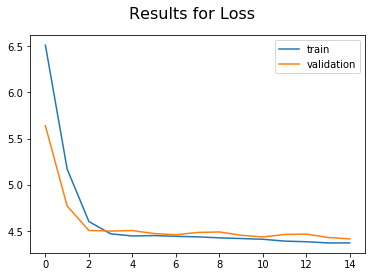

In [60]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['train','validation']) 
plt.suptitle('Results for Loss', fontsize=16)
plt.show()

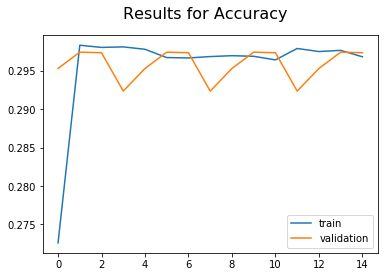

In [61]:
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.legend(['train','validation']) 
plt.suptitle('Results for Accuracy', fontsize=16)
plt.show()

Although model is giving better results than previous attempt yet we see same pattern of straight-wise plot in validation case.
There is no overfitting and results have improved. Let's see what else could be done? If we add more data i.e full data points then this might work better.